In [183]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score 

In [184]:
data=load_diabetes()

In [185]:
x=data.data

In [186]:
y=data.target

In [187]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [188]:
dg=DecisionTreeRegressor(criterion= 'poisson', max_depth=10, splitter='best')

In [189]:
dg.fit(x_train,y_train)


DecisionTreeRegressor(criterion='poisson', max_depth=10)

In [190]:
y_pred=dg.predict(x_test)
r2_score(y_test,y_pred)

0.2865707048162309

In [191]:
paremeter={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],

'splitter':['best','random'],
'max_depth':[2,4,5,6,8,10]}

In [192]:
gd=GridSearchCV(estimator=dg,param_grid=paremeter,cv=5
)

In [193]:
gd.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(criterion='poisson', max_depth=10),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 4, 5, 6, 8, 10],
                         'splitter': ['best', 'random']})

In [194]:
gd.best_params_

{'criterion': 'poisson', 'max_depth': 2, 'splitter': 'best'}

[Text(0.6038506270226537, 0.9545454545454546, 'x[2] <= 0.005\npoisson = 20.018\nsamples = 353\nvalue = 153.737'),
 Text(0.34375, 0.8636363636363636, 'x[8] <= -0.003\npoisson = 14.627\nsamples = 209\nvalue = 118.043'),
 Text(0.18987661812297735, 0.7727272727272727, 'x[8] <= -0.043\npoisson = 10.96\nsamples = 136\nvalue = 97.265'),
 Text(0.09071601941747573, 0.6818181818181818, 'x[4] <= -0.039\npoisson = 8.016\nsamples = 49\nvalue = 80.878'),
 Text(0.056836569579288024, 0.5909090909090909, 'x[4] <= -0.048\npoisson = 8.38\nsamples = 28\nvalue = 94.75'),
 Text(0.02953074433656958, 0.5, 'x[9] <= -0.076\npoisson = 5.9\nsamples = 23\nvalue = 82.696'),
 Text(0.006472491909385114, 0.4090909090909091, 'x[4] <= -0.082\npoisson = 3.442\nsamples = 4\nvalue = 113.0'),
 Text(0.003236245954692557, 0.3181818181818182, 'poisson = 0.0\nsamples = 1\nvalue = 70.0'),
 Text(0.009708737864077669, 0.3181818181818182, 'x[0] <= -0.047\npoisson = 0.557\nsamples = 3\nvalue = 127.333'),
 Text(0.006472491909385114, 

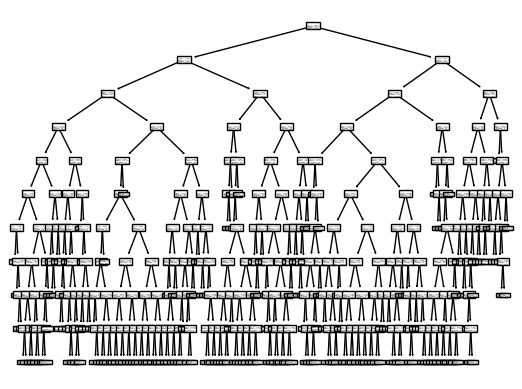

In [195]:
from sklearn.tree import plot_tree
plot_tree(dg)